In [1]:
### pip install pystan
### conda install -c conda-forge fbprophet
import pandas as pd
import prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


<Axes: >

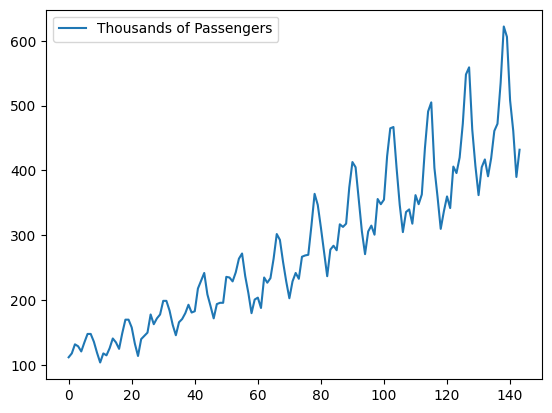

In [5]:
df.plot()

In [6]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [7]:
df.drop(144,axis=0,inplace=True)

In [8]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [10]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [11]:
from prophet import Prophet

In [12]:
dir(Prophet)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'calculate_initial_params',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logist

In [13]:
# Initialize the Model
model=Prophet()

In [14]:
df.columns

Index(['ds', 'y'], dtype='object')

In [15]:
df.dropna(axis=0,inplace=True)

In [16]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [17]:
model.fit(df)

16:27:08 - cmdstanpy - INFO - Chain [1] start processing
16:27:08 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [20]:
### Create future dates of 365 days
future_dates=model.make_future_dataframe(periods=365)

In [21]:
future_dates.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [22]:
prediction=model.predict(future_dates)

In [23]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,57.888963,113.181509,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,48.637371,106.695892,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,80.391415,138.174471,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,78.240445,136.014524,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,81.983786,138.842730,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


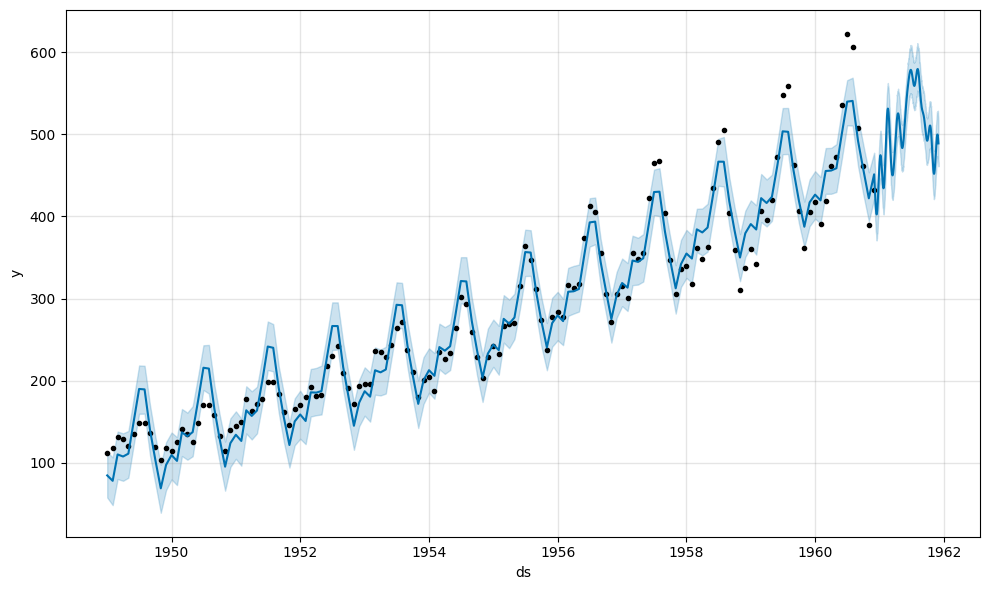

In [24]:
### plot the predicted projection
model.plot(prediction);

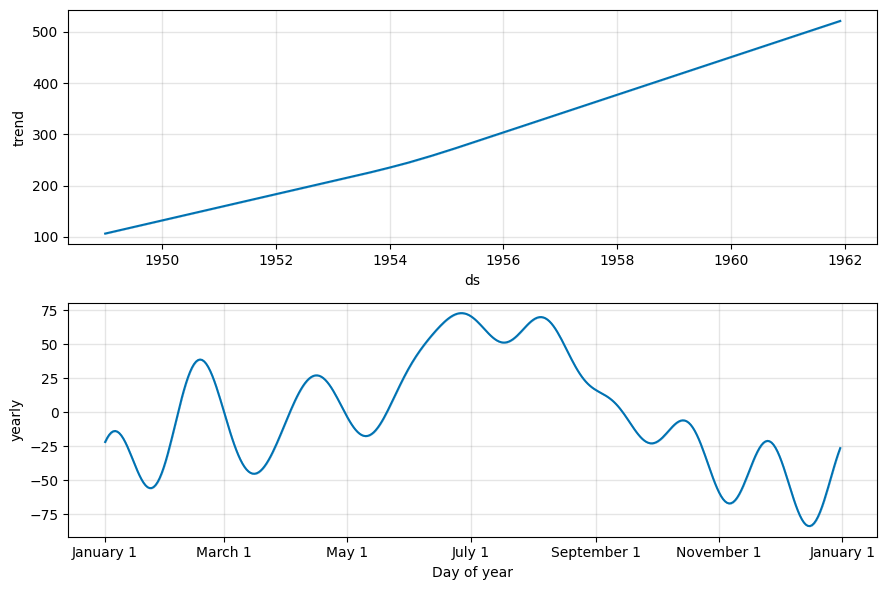

In [25]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction);

## Time Series Analysis

1960-1962---Cross Validation

1960-61---Train dataset

1961-62--Test dataset

1962-63---Validation

In [26]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [27]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

  0%|          | 0/19 [00:00<?, ?it/s]

16:27:09 - cmdstanpy - INFO - Chain [1] start processing
16:27:37 - cmdstanpy - INFO - Chain [1] done processing
16:27:37 - cmdstanpy - INFO - Chain [1] start processing
16:27:37 - cmdstanpy - INFO - Chain [1] done processing
16:27:37 - cmdstanpy - INFO - Chain [1] start processing
16:27:38 - cmdstanpy - INFO - Chain [1] done processing
16:27:38 - cmdstanpy - INFO - Chain [1] start processing
16:27:38 - cmdstanpy - INFO - Chain [1] done processing
16:27:38 - cmdstanpy - INFO - Chain [1] start processing
16:27:38 - cmdstanpy - INFO - Chain [1] done processing
16:27:39 - cmdstanpy - INFO - Chain [1] start processing
16:27:39 - cmdstanpy - INFO - Chain [1] done processing
16:27:39 - cmdstanpy - INFO - Chain [1] start processing
16:27:39 - cmdstanpy - INFO - Chain [1] done processing
16:27:40 - cmdstanpy - INFO - Chain [1] start processing
16:27:40 - cmdstanpy - INFO - Chain [1] done processing
16:27:40 - cmdstanpy - INFO - Chain [1] start processing
16:27:40 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.205061,156.977520,157.451509,150.0,1951-01-18
1,1951-03-01,169.726695,169.023752,170.545257,178.0,1951-01-18
2,1951-04-01,157.272915,155.785474,158.847496,163.0,1951-01-18
3,1951-05-01,143.304512,140.994116,145.848176,172.0,1951-01-18
4,1951-06-01,178.017955,174.757210,181.556012,178.0,1951-01-18


In [28]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585276,32.978558,25.828241,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.336159,31.848645,25.247395,0.076910,0.073741,0.077630,0.181818
2,46 days,909.313866,30.154832,24.670936,0.078810,0.079315,0.078584,0.136364
3,47 days,1044.683167,32.321559,26.845514,0.081984,0.085520,0.082145,0.136364
4,48 days,1034.252775,32.159801,26.300152,0.080102,0.085520,0.080328,0.181818


In [29]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,1087.585276,32.978558,25.828241,0.078205,0.073741,0.079259,0.227273
1,42 days,1014.336159,31.848645,25.247395,0.076910,0.073741,0.077630,0.181818
2,46 days,909.313866,30.154832,24.670936,0.078810,0.079315,0.078584,0.136364
3,47 days,1044.683167,32.321559,26.845514,0.081984,0.085520,0.082145,0.136364
4,48 days,1034.252775,32.159801,26.300152,0.080102,0.085520,0.080328,0.181818


C:\Users\manpr\anaconda3\lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
C:\Users\manpr\anaconda3\lib\site-packages\prophet\plot.py:548: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


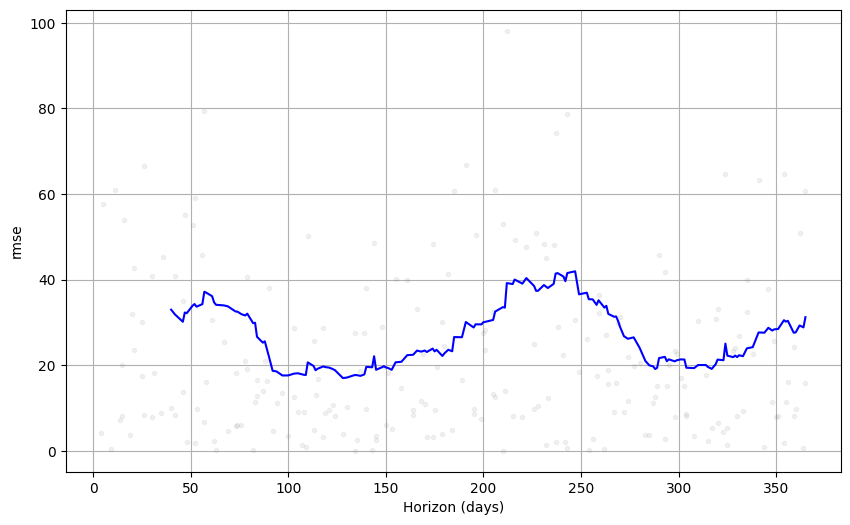

In [30]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')